In [1]:
# Single Cavity Mode : No Interaction
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import chirp, find_peaks, peak_widths
from qutip import *

In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/dawit/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylel

**Hamiltonian for Single Mode: No Interaction**

$H_{eff} = \delta_c (a^\dagger a) + g (p^\dagger a + p a^\dagger) + \delta_e(p^\dagger p) + \delta_2(r^\dagger r) + \Omega(r^\dagger p + r p^\dagger)$

**Parameters:**
$\\ g$ : cavity-atom (p-state) coupling
$\\ \delta_c$ : mode freq 
$\\ \delta_e$ : p-state freq (energy)
$\\ \delta_2$ : rydberg freq (energy)
$\\ \Omega$ : rydberg-p-state coupling

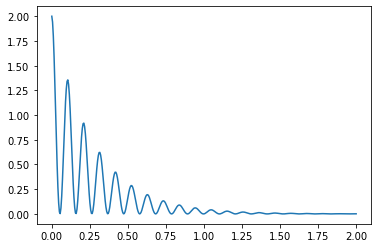

In [2]:
#3-level Atoms
# want to calculate transmission spectrum and plot 3 peaks 

# params
g = 30
omega = 0
delta_c = 0
delta_e = 0
delta_2 = 0
kappa = 1.4
gamma = 6
gamma_r = 0.01
prb = 0.2

cav_max = 3
p_max = 3
r_max = 3
phot_init = 2
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

# |phot, p, r>
psi0 = tensor([cav0, p0, r0]) 

# project(N, n , m), |n> <m|
pg = projection(3, 2, 1) # p -> g 
rg = projection(3, 2, 0) # r -> g 
pr = projection(3, 0, 1) # p -> r 

# collective bosonic a, p, r state destruction_ops
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = a.dag() + a

# H_effective
H = prb*drive + g*pexchange + omega*rexchange + delta_c*(a.dag()*a) + delta_e*(p.dag()*p) + delta_2*(r.dag()*r)

# collapse operators
c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

c = [c_phot, c_p, c_r]

#basic numbers and plots 
times = np.linspace(0.0, 2.0, 400)
result = mesolve(H, psi0, times, c, [a.dag()*a])

fig, ax = plt.subplots()
ax.plot(times, result.expect[0])

**Hamiltonian for Single Mode: No Interaction, Rotating Frame**

$H_{eff} = g (p^\dagger a + p a^\dagger) + \Omega(r^\dagger p + r p^\dagger) + \delta (a^\dagger a + p^\dagger p + r^\dagger r) + \delta_e(p^\dagger p) + \delta_2(r^\dagger r)$

**Parameters:**
* $\\ g$ : cavity-atom (p-state) coupling
* $\\ \delta$ : degenerate (searching) freq 
* $\\ \delta_e$ : p-state freq (energy)
* $\\ \delta_2$ : rydberg freq (energy)
* $\\ \Omega$ : rydberg-p-state coupling

**Plot Results:**
* We observe Electromagnetically Induced Transparency @ $\Delta = 0$ and $\Delta = \pm g$
* $\Omega = 0$ we recover VRS peaks; $\Omega > 0$ we get a new dark-mode peak at $\delta = 0$ from rydberg coupling.

**Why is dark mode peak at delta = 0?**

/home/dawit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:61: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'g=5 | $\\Omega$ =3 | $\\kappa$=1.4 | $\\Gamma_R$=0.1 | $\\Gamma_P$=6 | PrbPwr=0.3')

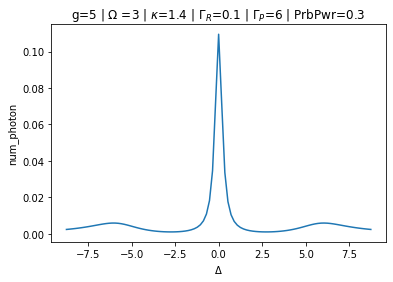

In [3]:
# plot equivalent of VRS 2 peaks 
# expect: 3 peaks

g = 5
omega = 3
#delta_c = 6
delta_e = 0
delta_2 = 0
kappa = 1.4
gamma = 6
gamma_r = 0.1
prb = 0.3

cav_max = 3
p_max = 3
r_max = 3
phot_init = 0
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

#
# collective bosonic a, p, r state destruction_ops
Id = tensor(qeye(cav_max), qeye(p_max), qeye(r_max))
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = a.dag() + a
#

npts = 50
nphot = np.empty(2*npts)
deltas = np.linspace(0, 1.5*np.sqrt(g**2 + omega**2), npts)
deltas = np.concatenate([np.linspace(-1.5*np.sqrt(g**2 + omega**2), 0, npts, endpoint=False), deltas])

for i, delta in enumerate(deltas, start=0):
    #Hamiltonian
    
    # pexchange probably not working as it should
    H = prb*drive + g*pexchange + omega*rexchange + delta*(a.dag()*a + p.dag()*p + r.dag()*r) + delta_e*(p.dag()*p) + delta_2*(r.dag()*r)    
    # it is essential that the atom and cav states at delta are
    # triply degenerate
    
    # collapse operators
    c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
    c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
    c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))
    
    c = [c_phot, c_p, c_r]
    
    rho_ss = steadystate(H, c , method='direct')
    nphot[i] = np.trace(a.dag()*a*rho_ss)
    # expectation of num operator for each delta value 

fig = plt.figure()
plt.plot(deltas, nphot)
plt.xlabel('$\Delta$')
plt.ylabel('num_photon')
plt.title('g='+str(g) +  ' | $\Omega$ =' + str(omega) + ' | $\kappa$=' + str(kappa)  + ' | $\Gamma_R$=' + str(gamma_r) +' | $\Gamma_P$=' + str(gamma) + ' | PrbPwr=' + str(prb))

**Hamiltonian for Single Mode: Interaction, Rotating Frame?**

$H_{eff} = g (p^\dagger a + p a^\dagger) + \Omega(r^\dagger p + r p^\dagger) + \delta (a^\dagger a + p^\dagger p + r^\dagger r) + \delta_e(p^\dagger p) + \delta_2(r^\dagger r) +  \frac{U}{2} r^\dagger r^\dagger r r$

**Interaction:**
* $\frac{U}{2} r^\dagger r^\dagger r r |n\rangle = U*\frac{n(n-1)}{2}|n\rangle = U*C(n, 2)|n\rangle$ where $|n\rangle$ is a rydberg number state
* interaction term counts unique pairs of rydberg
* probing on dark mode: strong anti-bunching 
* probing on bright mode: weaker anti-bunching

*This is expected becuase rydbergs have stronger interaction than p-states*

**Parameters:**
* $\\ g$ : cavity-atom (p-state) coupling
* $\\ \Omega$ : rydberg-p-state coupling
* $\\ \delta$ : degenerate (searching) freq 
* $\\ \delta_e$ : p-state freq (energy)
* $\\ \delta_2$ : rydberg freq (energy)
* $\\U_{nmpq}$ : energy of interaction

/home/dawit/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: ComplexWarning: Casting complex values to real discards the imaginary part


Text(0.5, 1.0, 'g=5 | $\\Omega$ =3 | $\\kappa$=1.4 | $\\Gamma_R$=0.1 | $\\Gamma_P$=6 | PrbPwr=0.3')

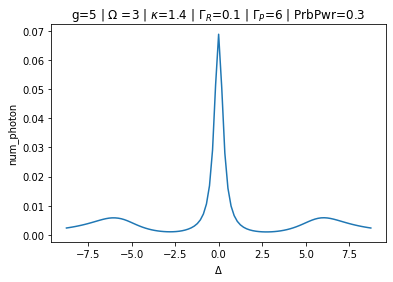

In [4]:
# plot EIT spectrum AFTER adding interaction term to see if spectrum changes 

# plot equivalent of VRS 2 peaks 
# expect: 3 peaks

g = 5
omega = 3
#delta_c = 6
delta_e = 0
delta_2 = 0
U = 10
kappa = 1.4
gamma = 6
gamma_r = 0.1
prb = 0.3

cav_max = 3
p_max = 3
r_max = 3
phot_init = 0
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

#
# collective bosonic a, p, r state destruction_ops
Id = tensor(qeye(cav_max), qeye(p_max), qeye(r_max))
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = a.dag() + a
interaction = U * 1/2 *r.dag()*r.dag()*r*r
#

npts = 50
nphot = np.empty(2*npts)
deltas = np.linspace(0, 1.5*np.sqrt(g**2 + omega**2), npts)
deltas = np.concatenate([np.linspace(-1.5*np.sqrt(g**2 + omega**2), 0, npts, endpoint=False), deltas])

for i, delta in enumerate(deltas, start=0):
    #Hamiltonian
    
    # pexchange probably not working as it should
    H = prb*drive + g*pexchange + omega*rexchange + interaction + delta*(a.dag()*a + p.dag()*p + r.dag()*r) + delta_e*(p.dag()*p) + delta_2*(r.dag()*r)    
    # it is essential that the atom and cav states at delta are
    # triply degenerate
    
    # collapse operators
    c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
    c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
    c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))
    
    c = [c_phot, c_p, c_r]
    
    rho_ss = steadystate(H, c , method='direct')
    nphot[i] = np.trace(a.dag()*a*rho_ss)
    # expectation of num operator for each delta value 

fig = plt.figure()
plt.plot(deltas, nphot)
plt.xlabel('$\Delta$')
plt.ylabel('num_photon')
plt.title('g='+str(g) +  ' | $\Omega$ =' + str(omega) + ' | $\kappa$=' + str(kappa)  + ' | $\Gamma_R$=' + str(gamma_r) +' | $\Gamma_P$=' + str(gamma) + ' | PrbPwr=' + str(prb))

**Curious result that the dark peak and bright beaks occur at almost the exact same place as when U = 0**

* Look into it more closely 
* Look into why the bright peaks occur at: $\Delta = \pm \sqrt{g^2 + \Omega^2}$
* Look into why the dark peak occurs at: $\Delta = 0$

U = 10
g2[0] = (0.04016977072115961+0j)


/home/dawit/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'g=5 | U=10 | $\\Omega$ =2 | $\\kappa$=1.4 | $\\Gamma_R$=0.1 | $\\Gamma_P$=6 | PrbPwr=0.001')

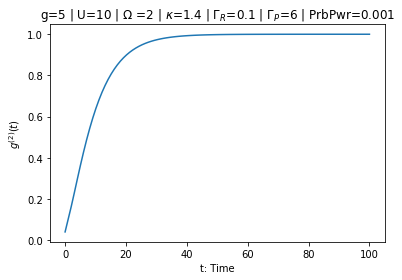

In [5]:
# Interaction term for single cavity mode and therefore rydberg mode 
# angular mode restricted to just a single mode 
# resulting in blockade

# Probing on dark mode peak
# @ delta_c = delta_e = delta_2 = 0 

# params
g = 5
omega = 2
delta = 0 # rotating frame: r, p and cav are all degenerate
#delta_c = 0
#delta_e = 0
#delta_2 = 0
U = 10 # MHZ so 10^6? 

# decay rates
kappa = 1.4
gamma = 6
gamma_r = 0.1
prb = 0.001

cav_max = 3
p_max = 3
r_max = 3
phot_init = 0
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

# |phot, p, r>
psi0 = tensor([cav0, p0, r0]) 

# project(N, n , m), |n> <m|
pg = projection(3, 2, 1) # p -> g 
rg = projection(3, 2, 0) # r -> g 
pr = projection(3, 0, 1) # p -> r 

# collective bosonic a, p, r state destruction_ops
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = (a.dag() + a)

# interaction term 
# counts unique pairs of rydbergs and assigns interaction energy of U to each
# num_pairs = C(n, 2) = n(n-1)/2
# which translates to the operator form below
interaction = U * 1/2 *r.dag()*r.dag()*r*r


# H_effective
H = prb*drive + g*pexchange + omega*rexchange + interaction + delta*(a.dag()*a + p.dag()*p + r.dag()*r)

# collapse operators
c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

c = [c_phot, c_p, c_r]


# prepare options for mesolver to not tidy up small values
# we don't want to loose small numbers 
options = Options(tidy=False)

# steady state 
rho_ss = steadystate(H, c, method='direct')
times = np.linspace(0, 100, 100) # includes t=0

# calculate time evolition after removing a photon
rho_m1 = a * rho_ss * a.dag() # remove one photon from SS
norm = np.trace(rho_m1) # normalization factor 
rho_m1 = a * (rho_ss / norm) * a.dag() # renormalize SS
rho_m1_t = mesolve(H, rho_m1, times, c, [a.dag()*a], options=options)

# build g2
num = rho_m1_t.expect[0] * norm  
den = np.power(np.trace(a.dag()*a*rho_ss), 2)

g2 = num/den 

print('U =', U)
print('g2[0] =', g2[0]) 

#matplotlib
fig=plt.figure()
plt.plot(times, g2)   
plt.xlabel('t: Time')
plt.ylabel('$g^{(2)}(t)$')
plt.title('g='+str(g) + ' | U=' + str(U) + ' | $\Omega$ =' + str(omega) + ' | $\kappa$=' + str(kappa)  + ' | $\Gamma_R$=' + str(gamma_r) +' | $\Gamma_P$=' + str(gamma) + ' | PrbPwr=' + str(prb))

U = 10
g2[0] = (0.9915070394517278+0j)


/home/dawit/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'g=5 | U=10 | $\\Omega$ =2 | $\\kappa$=1.4 | $\\Gamma_R$=0.1 | $\\Gamma_P$=6 | PrbPwr=0.001')

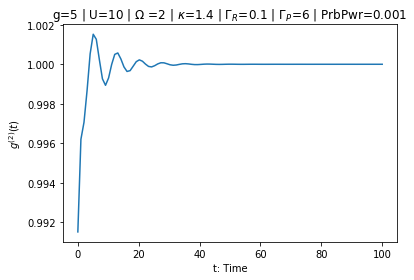

In [6]:
# probe on VRS peaks and plot g2(t) should be less antibunching
# since p-modes don't interact, should see significant less anti-bunching

# Probing on bright mode peak
# @ delta = sqrt(g**2 + omega**2)

# params
g = 5
omega = 2
delta = np.sqrt(g**2 + omega**2)
#delta_c = 0
#delta_e = 0
#delta_2 = 0
U = 10 # MHZ so 10^6? 

# decay rates
kappa = 1.4
gamma = 6
gamma_r = 0.1
prb = 0.001

cav_max = 3
p_max = 3
r_max = 3
phot_init = 0
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

# |phot, p, r>
psi0 = tensor([cav0, p0, r0]) 

# project(N, n , m), |n> <m|
pg = projection(3, 2, 1) # p -> g 
rg = projection(3, 2, 0) # r -> g 
pr = projection(3, 0, 1) # p -> r 

# collective bosonic a, p, r state destruction_ops
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = (a.dag() + a)

# interaction term 
# counts unique pairs of rydbergs and assigns interaction energy of U to each
# num_pairs = C(n, 2) = n(n-1)/2
# which translates to the operator form below
interaction = U * 1/2 *r.dag()*r.dag()*r*r


# H_effective
H = prb*drive + g*pexchange + omega*rexchange + interaction + delta*(a.dag()*a + p.dag()*p + r.dag()*r)

# collapse operators
c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

c = [c_phot, c_p, c_r]


# prepare options for mesolver to not tidy up small values
# we don't want to loose small numbers 
options = Options(tidy=False)

# steady state 
rho_ss = steadystate(H, c, method='direct')
times = np.linspace(0, 100, 100) # includes t=0

# calculate time evolition after removing a photon
rho_m1 = a * rho_ss * a.dag() # remove one photon from SS
norm = np.trace(rho_m1) # normalization factor 
rho_m1 = a * (rho_ss / norm) * a.dag() # renormalize SS
rho_m1_t = mesolve(H, rho_m1, times, c, [a.dag()*a], options=options)

# build g2
num = rho_m1_t.expect[0] * norm  
den = np.power(np.trace(a.dag()*a*rho_ss), 2)

g2 = num/den 

print('U =', U)
print('g2[0] =', g2[0]) 

#matplotlib
fig=plt.figure()
plt.plot(times, g2)   
plt.xlabel('t: Time')
plt.ylabel('$g^{(2)}(t)$')
plt.title('g='+str(g) + ' | U=' + str(U) + ' | $\Omega$ =' + str(omega) + ' | $\kappa$=' + str(kappa)  + ' | $\Gamma_R$=' + str(gamma_r) +' | $\Gamma_P$=' + str(gamma) + ' | PrbPwr=' + str(prb))

g2[0] = (0.9972575003135817+0j)


/home/dawit/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'g=0 | U=0 | $\\Omega$ =0 | $\\kappa$=1.4 | $\\Gamma_R$=0.1 | $\\Gamma_P$=6 | PrbPwr=0.03')

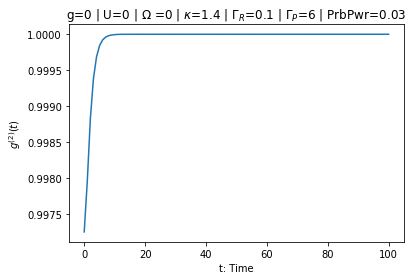

In [7]:
# plotting g2 for probe laser

# params
g = 0
omega = 0
delta = 0
delta_c = 0
delta_e = 0
delta_2 = 0
U = 0

# decay rates
kappa = 1.4
gamma = 6
gamma_r = 0.1
prb = 0.03

cav_max = 3
p_max = 3
r_max = 3
phot_init = 0
r_init = 0
p_init = 0

cav0 = basis(cav_max, n = phot_init)
p0 = basis(p_max, n = p_init)
r0 = basis(r_max, n = r_init)

# |phot, p, r>
psi0 = tensor([cav0, p0, r0]) 

# project(N, n , m), |n> <m|
pg = projection(3, 2, 1) # p -> g 
rg = projection(3, 2, 0) # r -> g 
pr = projection(3, 0, 1) # p -> r 

# collective bosonic a, p, r state destruction_ops
a = tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
p = tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
r = tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

# cavity p state exchange and p, r-state exchange
pexchange = tensor(create(cav_max), destroy(p_max), qeye(r_max))
pexchange = pexchange + pexchange.dag()
rexchange =  tensor(qeye(cav_max), create(p_max), destroy(r_max))
rexchange = rexchange + rexchange.dag()
drive = (a.dag() + a)

# interaction term 
# counts unique pairs of rydbergs and assigns interaction energy of U to each
# num_pairs = C(n, 2) = n(n-1)/2
# which translates to the operator form below
interaction = U * 1/2 *r.dag()*r.dag()*r*r


# H_effective
H = prb*drive + g*pexchange + omega*rexchange + interaction + delta*(a.dag()*a + p.dag()*p + r.dag()*r)

# collapse operators
c_phot = np.sqrt(kappa)*tensor(destroy(cav_max), qeye(p_max), qeye(r_max))
c_p = np.sqrt(gamma)*tensor(qeye(cav_max), destroy(p_max), qeye(r_max))
c_r = np.sqrt(gamma_r)*tensor(qeye(cav_max), qeye(p_max), destroy(r_max))

c = [c_phot, c_p, c_r]


# prepare options for mesolver to not tidy up small values
# we don't want to loose small numbers 
options = Options(tidy=False)

# steady state 
rho_ss = steadystate(H, c, method='direct')
times = np.linspace(0, 100, 100) # includes t=0

# calculate time evolition after removing a photon
rho_m1 = a * rho_ss * a.dag() # remove one photon from SS
norm = np.trace(rho_m1) # normalization factor 
rho_m1 = a * (rho_ss / norm) * a.dag() # renormalize SS
rho_m1_t = mesolve(H, rho_m1, times, c, [a.dag()*a], options=options)

# build g2
num = rho_m1_t.expect[0] * norm  
den = np.power(np.trace(a.dag()*a*rho_ss), 2)

g2 = num/den 
# g2  = coherence_function_g2(H, rho_ss, times, c, a)[0] # return normalized g2
   
print('g2[0] =', g2[0]) 

#matplotlib
fig=plt.figure()
plt.plot(times, g2)
plt.xlabel('t: Time')
plt.ylabel('$g^{(2)}(t)$')
plt.title('g='+str(g) + ' | U=' + str(U) + ' | $\Omega$ =' + str(omega) + ' | $\kappa$=' + str(kappa)  + ' | $\Gamma_R$=' + str(gamma_r) +' | $\Gamma_P$=' + str(gamma) + ' | PrbPwr=' + str(prb))